In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../Datasets/air_quality_shilin.csv")

In [ ]:
df.head(10)

# Một cái nhìn tổng quan khác về chất lượng không khí tại Shilin, Đài Loan giai đoạn từ năm 2016-2024


Chuyển cột `date` về kiểu `datetime`


In [3]:
df["date"] = pd.to_datetime(df["date"])
df["date"].dtype

dtype('<M8[ns]')

## BẢNG ĐÁNH GIÁ MỨC ĐỘ CHẤT LƯỢNG KHÔNG KHÍ DỰA TRÊN CHỈ SỐ AQI


| AQI       | Mức độ chất lượng không khí      | Ảnh hưởng sức khỏe                              |
| --------- | -------------------------------- | ----------------------------------------------- |
| 0 - 50    | Tốt (Good)                       | Không có nguy cơ sức khỏe.                      |
| 51 - 100  | Trung bình (Moderate)            | Người nhạy cảm có thể bị ảnh hưởng nhẹ.         |
| 101 - 150 | Không tốt cho nhóm nhạy cảm      | Người nhạy cảm nên hạn chế ra ngoài.            |
| 151 - 200 | Không tốt cho tất cả (Unhealthy) | Mọi người nên hạn chế các hoạt động ngoài trời. |
| 201 - 300 | Rất xấu (Very Unhealthy)         | Ảnh hưởng nghiêm trọng đến sức khỏe.            |
| 301+      | Nguy hại (Hazardous)             | Tất cả mọi người nên ở trong nhà.               |


## CHẤT Ô NHIỄM NÀO ẢNH HƯỞNG ĐẾN CHẤT LƯỢNG KHÔNG KHÍ NHIỀU NHẤT TRONG GIAI ĐOẠN 2016 - 2024 Ở SHILIN, ĐÀI LOAN ??


1. **Các thuộc tính sử dụng**

- `aqi`: chỉ số đánh giá chất lượng không khí
- `pollutant`: chất ô nhiễm chính được ghi nhận

2. **Loại biểu đồ**

      Biểu đồ boxplot: biểu đồ thể hiện các giá trị (outliers, min, max, 3 tứ phân vị) của một tập dữ liệu

3. **Ý nghĩa của biểu đồ**

      Biểu đồ boxplot thể hiện sự phân phối của chỉ số `aqi` qua từng chất ô nhiễm có trong thuộc tính `pollutant`

4. **Nguyên nhân sử dụng**

      Giúp nhận thấy được sự phân phối của chỉ số `aqi` của các chất ô nhiễm chênh lệch như thế nào, qua đó nhận diện được chất ảnh hưởng nhiều nhất đến chỉ số `aqi`

5. **Kết luận**

- Chất ô nhiễm `Ozone (8hr)` có hình boxplot lệch lên phía trên và kéo dài hơn so với các chất ô nhiễm khác, và có nhiều điểm ngoại lai tương ứng với giá trị 140 trở lên (ứng với chất lượng không khí `Không tốt cho nhóm nhạy cảm`), và có vài điểm vượt qua mức 180 (ứng với chất lượng không khí `Không tốt cho tất cả mọi người`). Điều này cho thấy chất này ảnh hưởng rất nhiều đến chất lượng không khí

- Chất ô nhiễm `PM2.5` có các điểm ngoại lai phân bố dày đặc trong khoảng 100 đến 160 (ứng với chất lượng không khí `Không tốt cho nhóm nhạy cảm` và `Không tốt cho tất cả mọi người`). Điều này cho thấy chất này cũng gây ô nhiễm không khí đáng kể bên cạnh chất `Ozone (8hr)`

- Chất ô nhiễm `PM10` không có các điểm ngoại lai, nhưng trung vị lại cao hơn hai chất `PM2.5` và `Ozone (8hr)` (ở mức gần 80 ứng với chất lượng không khí `Trung bình`), tức là một nửa giá trị `aqi` ứng với chất này là cao hơn 80, bên cạnh đó hình hộp kéo dài đến khoảng gần 130 (ứng với chất lượng không khí `Không tốt cho nhóm nhạy cảm`), như vậy chất lượng không khí bị ảnh hưởng bởi chất này khá nhiều nhưng không đáng kể như 2 chất ở trên

- Hai chất ô nhiễm `SO2` và `NO2` có hình hộp dẹp và chỉ phân bố trong khoảng từ 50 đến 70 ứng với chất lượng không khí `Trung bình`, cho thấy 2 chất này không ảnh hưởng nhiều đến chất lượng không khí

- Do đó 2 chất `Ozone (8hr)` và `PM2.5` ảnh hưởng nhiều nhất đến chất lượng không khí ở tại Shilin, Đài Loan trong giai đoạn 2016 - 2024


Vẽ biểu đồ


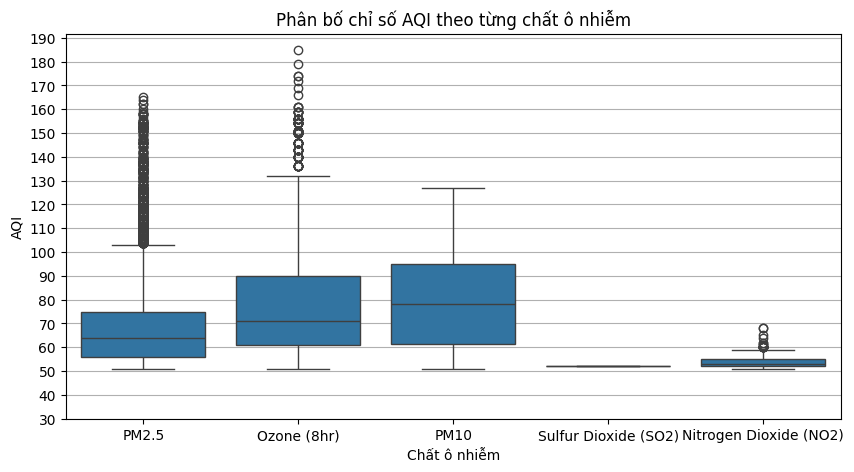

In [4]:
def ve_bieu_do(df):
    df_have_pollutant = df[df["pollutant"] != "Normal"]

    plt.figure(figsize=(10, 5))
    sns.boxplot(x="pollutant", y="aqi", data=df_have_pollutant)
    plt.title("Phân bố chỉ số AQI theo từng chất ô nhiễm")
    plt.xlabel("Chất ô nhiễm")
    plt.ylabel("AQI")
    plt.grid(axis="y")

    plt.yticks(range(30, 200, 10))
    plt.show()


ve_bieu_do(df)

## THỜI GIAN NÀO TRONG NĂM CÓ CHẤT LƯỢNG KHÔNG KHÍ TỆ TRONG GIAI ĐOẠN 2016 - 2024 Ở SHILIN, ĐÀI LOAN ?


1. **Các thuộc tính sử dụng**

- `aqi`: chỉ số đánh giá chất lượng không khí
- `date`: thời gian quan sát được ghi nhận

2. **Loại biểu đồ**

- Biểu đồ heatmap: một dạng biểu đồ biểu diễn dữ liệu dưới dạng ma trận màu sắc. Màu sắc trong heatmap biểu thị cường độ hoặc giá trị của dữ liệu tại các vị trí tương ứng.

3. **Ý nghĩa của biểu đồ**

- Biểu đồ heatmap thể hiện trung bình giá trị `aqi` trong giai đoạn 2016 - 2024 qua các ngày trong năm

4. **Nguyên nhân sử dụng**

- Làm nổi bật thời gian mà khi đó chỉ số `aqi` lớn tương ứng với chất lượng không khí tệ đi trong năm

5. **Kết luận**

- Giai đoạn từ tháng `1` đến tháng `5` ở Đài Loan có màu đậm hơn so với giai đoạn từ tháng `6` đến tháng `12` chứng tỏ giai đoạn đầu năm, chất lượng không khí tệ hơn so với giai đoạn cuối

- Trong giai đoạn từ tháng `1` đến tháng `5`, tháng `4` và tháng `3` có màu đậm nhất (ứng với từ giá trị `aqi` 60 trở lên), chứng tỏ trong 2 tháng này, chất lượng không khí ở mức đáng báo động

- Trong giai đoạn từ tháng `6` đến tháng `12`, tháng `6` và tháng `7` có màu nhạt nhất (ứng với giá trị `aqi` trong khoảng từ 30 đến 40), do đó trong 2 tháng này, chất lượng không khí tốt, ngược lại tháng `10` có màu đậm nhất (ứng với giá trị `aqi` từ 50 trở lên), chất lượng không khí tệ đi


Tạo 2 cột mới `day` và `month` từ cột `date`


In [5]:
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month

Vẽ biểu đồ


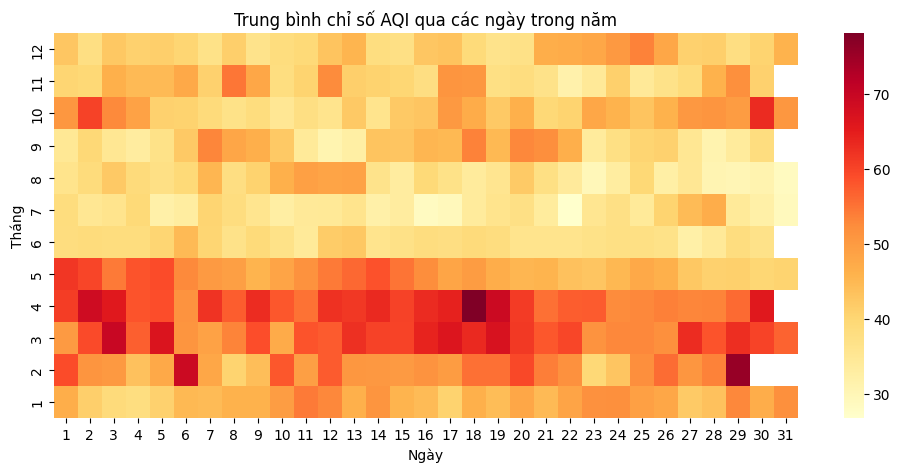

In [6]:
def ve_bieu_do(df):
    daily_aqi = df.groupby(["month", "day"])["aqi"].mean().unstack()

    daily_aqi.sort_index(ascending=False, inplace=True)

    # ve bieu do
    plt.figure(figsize=(12, 5))
    sns.heatmap(daily_aqi, cmap="YlOrRd", cbar=True)
    plt.title("Trung bình chỉ số AQI qua các ngày trong năm")
    plt.xlabel("Ngày")
    plt.ylabel("Tháng")
    plt.show()


ve_bieu_do(df)

## THỜI ĐIỂM NÀO TRONG NGÀY CÓ CHẤT LƯỢNG KHÔNG KHÍ TỆ TRONG GIAI ĐOẠN 2016 - 2024 Ở SHILIN, ĐÀI LOAN ?


1. **Các thuộc tính sử dụng**

- `aqi`: chỉ số đánh giá chất lượng không khí
- `date`: thời gian quan sát được ghi nhận

2. **Loại biểu đồ**

- Biểu đồ Violin: dạng biểu đồ dùng để biểu diễn phân phối xác suất của dữ liệu, kết hợp giữa tính năng của Box Plot và Density Plot (đường mật độ).

3. **Ý nghĩa của biểu đồ**

      Biểu đồ Violin thể hiện được cả phân phối giá trị `aqi` (density plot) và các thống kê cơ bản (boxplot)

4. **Nguyên nhân sử dụng**

      Thể hiện được phân phối giá trị `aqi` qua các thời điểm trong ngày và nhận diện được tần suất xảy ra các giá trị `aqi` tương ứng với từng cấp độ ô nhiễm không khí

5. **Kết luận**

- Biểu đồ ở 4 thời điểm đều dày như nhau trong khoảng từ 100 - 110, tức là tần suất đo được giá trị `aqi` ở khoảng 100 - 110 ở 4 thời điểm là như nhau
- Ở 2 thời điểm `0 - 6h` và `18 - 23h`, khá dày trong khoảng từ 140 - 150 (tiệm cận 151 ứng với chất lượng không khí `Không tốt cho tất cả`), ngược lại trong 2 thời điểm `7 - 12h` và `13 - 17h`, rất mỏng, ứng với tần suất đo được giá `aqi` từ 140 - 150 trong 2 thời điểm `0 - 6h` và `18 - 23h` cao hơn nhiều 2 thời điểm `7 - 12h` và `13 - 17h`. Điều này chứng tỏ nguy cơ ô nhiễm không khí ở 2 thời điểm `0 - 6h` và `18 - 23h` là khá cao.


- Tạo cột `hour` từ cột `date`

- Tạo cột `hour_period` từ cột `hour`

- Cột `hour_period` ứng với các thời điểm (từ 0h - 6h, 7h - 12h, 13h - 17h, 18h - 23h)


In [7]:
df["hour"] = df["date"].dt.hour

df["hour_period"] = pd.cut(
    df["hour"],
    bins=[0 - 1, 6, 12, 17, 23],
    labels=["0 - 6", "7 - 12", "13 - 17", "18 - 23"],
)

Lọc các giá trị `aqi` từ 101 đến 150 ứng với chất lượng không khí `Không tốt cho nhóm nhạy cảm`


In [8]:
df_aqi_from_101_150 = df[(df["aqi"] > 100) & (df["aqi"] <= 150)]

Vẽ biểu đồ


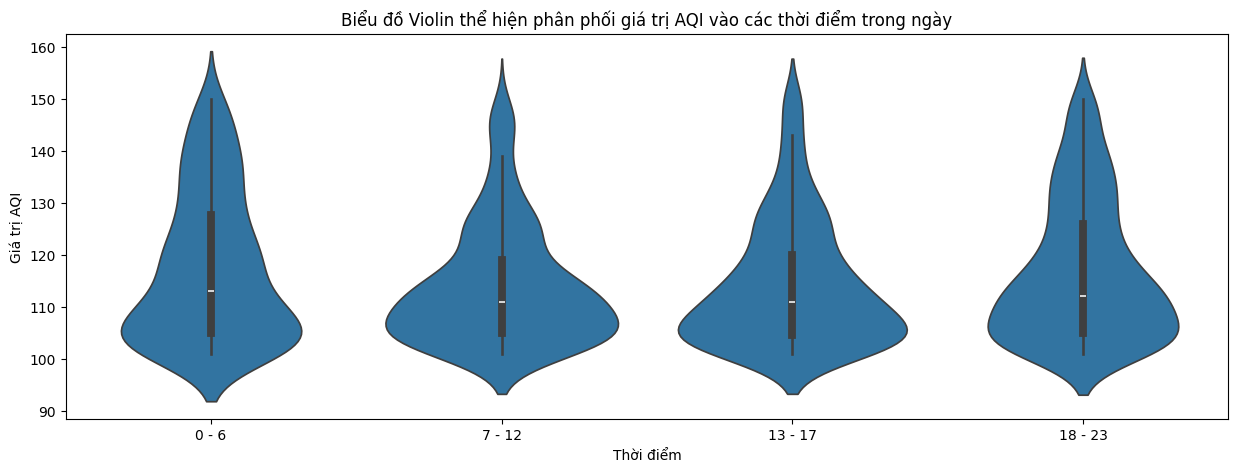

In [9]:
def ve_bieu_do(df_aqi_from_101_150):
    plt.figure(figsize=(15, 5))

    sns.violinplot(x="hour_period", y="aqi", data=df_aqi_from_101_150)

    plt.title(
        "Biểu đồ Violin thể hiện phân phối giá trị AQI vào các thời điểm trong ngày"
    )
    plt.xlabel("Thời điểm")
    plt.ylabel("Giá trị AQI")
    plt.show()


ve_bieu_do(df_aqi_from_101_150)